In [1]:
import pandas as pd
import numpy as np

Substitute for own data path

In [2]:
#df = pd.read_csv(r'C:\Users\eric7\OneDrive\Desktop\aps360Project\convolutional-neural-nuts\data\set.csv')
df = pd.read_csv("../data/set.csv")
print("successfully retrieved csv file")

successfully retrieved csv file


IN CSV files, formate as [path:genus]
Created a dictionary that has keys as genus, and items as image paths

In [3]:
grouped = df.groupby('Genus')['Path'].apply(list).to_dict()

mapping = {key: np.array(value) for key, value in grouped.items()}

Analysis of data
- help decide cnn approach
- all data in a numpy dictionary called mapping

In [4]:
print(f"number of classes: {len(mapping)}")

number of classes: 70


In [6]:
LessThan75 = 0
MoreThan75 = 0
totalCount = 0
for dict_keys in mapping.keys():
    totalCount += len(mapping[dict_keys])
    if len(mapping[dict_keys]) > 75:
        print(f"Class name: {dict_keys}, number of images: {len(mapping[dict_keys])}")
        MoreThan75 += 1
    else:
        LessThan75 += 1
print(f"More than 75: {MoreThan75}")
print(f"Less Than 75: {LessThan75}")
print(f"Total Images {totalCount}")

Class name: Amanita, number of images: 520
Class name: Amauroderma, number of images: 535
Class name: Antrodia, number of images: 312
Class name: Aurantiopileus, number of images: 367
Class name: Auricularia, number of images: 1559
Class name: Boletinellus, number of images: 384
Class name: Brunneocorticium, number of images: 432
Class name: Calocera, number of images: 503
Class name: Calvatia, number of images: 399
Class name: Camillea, number of images: 448
Class name: Chlorophyllum, number of images: 319
Class name: Clavaria, number of images: 839
Class name: Cookeina, number of images: 2879
Class name: Coprinellus, number of images: 912
Class name: Cordierites, number of images: 320
Class name: Coriolopsis, number of images: 368
Class name: Cotylidia, number of images: 448
Class name: Cyathus, number of images: 872
Class name: Cymatoderma, number of images: 471
Class name: Cyptotrama, number of images: 351
Class name: Dacryopinax, number of images: 727
Class name: Dicephalospora, n

In [27]:
#variable to track number of clases
n = int(len(mapping) /2)
print(n)

35


CNN model with transfer learning

In [8]:
#imports
#need to pip install torch here
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image

In [9]:
class preLearnedFungaV1(nn.Module):
    def __init__(self):
        super(preLearnedFungaV1, self).__init__()
        self.name = "fungaV1"
        self.fc1 = nn.Linear(256*6*6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, n)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = x.squeeze(1)  
        return x

Create training, validation and testing
- apply the transfer learning here

In [10]:
#need to install torchvision
from torch.utils.data import TensorDataset
from torchvision import transforms
#adjust to 224 dimension (input to alexnet)
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224,224))])

In [11]:
#use alexnet for now
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

c:\Users\Nicholas\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Nicholas\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
#running this takes a long time, only do it after set.csv is fixed
dict = {}
print(f"Total number of classes {n}")
print("Start Transfer Learning Section: AlexNet feature extract for each class")
iterCount = 1

for key, images in mapping.items():
    if iterCount > n:
        break
    print(f"Class {iterCount} out of {n}")
    dict[key] = []
    for img in images:
        newImg = Image.open(img)
        newImg = transform(newImg)
        feat = alexnet.features(newImg)
        dict[key].append(feat)
    iterCount += 1


Total number of classes 35.0
Start Transfer Learning Section: AlexNet feature extract for each class
Class 1 out of 35.0
Class 2 out of 35.0
Class 3 out of 35.0
Class 4 out of 35.0
Class 5 out of 35.0
Class 6 out of 35.0
Class 7 out of 35.0
Class 8 out of 35.0
Class 9 out of 35.0
Class 10 out of 35.0
Class 11 out of 35.0
Class 12 out of 35.0
Class 13 out of 35.0
Class 14 out of 35.0
Class 15 out of 35.0
Class 16 out of 35.0
Class 17 out of 35.0
Class 18 out of 35.0
Class 19 out of 35.0
Class 20 out of 35.0
Class 21 out of 35.0
Class 22 out of 35.0
Class 23 out of 35.0
Class 24 out of 35.0
Class 25 out of 35.0
Class 26 out of 35.0
Class 27 out of 35.0
Class 28 out of 35.0
Class 29 out of 35.0
Class 30 out of 35.0
Class 31 out of 35.0
Class 32 out of 35.0
Class 33 out of 35.0
Class 34 out of 35.0
Class 35 out of 35.0


In [14]:
#change from str key to numerical key
mappingStrToInt = {idx: value for idx, (key, value) in enumerate(dict.items())}
print(len(mappingStrToInt))

35


In [15]:
#numerical dictionary
numericalDict = {}
for idx, (key, value) in enumerate(dict.items()):
    numericalDict[idx] = value
print(len(numericalDict))

35


In [16]:
# Split data into training, validation, and testing sets
tData, tLabel = [], []
vData, vLabel = [], []
testingData, testingLabel = [], []

print("Running data dictionary")
numIter = 1
#0.75 training, 0.15 valdiation, 0.10 for testing
for key, values in numericalDict.items():
    if numIter > n:
        break
    numTrain = int(len(values) * 0.75)
    numVal = int(len(values) * 0.15)

    tLabel.extend([key] * numTrain)
    vLabel.extend([key] * numVal)
    testingLabel.extend([key] * (len(values) - numTrain - numVal))

    tData.extend(values[:numTrain])
    vData.extend(values[numTrain:numTrain + numVal])
    testingData.extend(values[numTrain + numVal:])

    numIter += 1
print("Complete Running Data Dictionary")
tTensor = torch.stack(tData)
vTensor = torch.stack(vData)
testingTensor = torch.stack(testingData)

tLabelTensor = torch.tensor(tLabel)
vLabelTensor = torch.tensor(vLabel)
testingLabelTensor = torch.tensor(testingLabel)

train_set = TensorDataset(tTensor, tLabelTensor)
validation_set = TensorDataset(vTensor, vLabelTensor)
test_set = TensorDataset(testingTensor, testingLabelTensor)

Running data dictionary
Complete Running Data Dictionary


In [17]:
print(f'tTensor shape: {tTensor.shape}')
print(f'vTensor shape: {vTensor.shape}')
print(f'testingTensor shape: {testingTensor.shape}')

tTensor shape: torch.Size([18169, 256, 6, 6])
vTensor shape: torch.Size([3619, 256, 6, 6])
testingTensor shape: torch.Size([2443, 256, 6, 6])


In [18]:
#testing if train, validation, and test sets work
print(len(train_set))
print(len(validation_set))
print(len(test_set))

18169
3619
2443


Data Loading

In [19]:
#customized data_loading function with variable batch size
import torch
def dataLoadFunction(BatchSize):
  train_load = torch.utils.data.DataLoader(train_set, batch_size = BatchSize, shuffle=True)
  validation_load = torch.utils.data.DataLoader(validation_set, batch_size = BatchSize)
  testing_load = torch.utils.data.DataLoader(test_set, batch_size = BatchSize)
  return train_load, validation_load, testing_load

Training code

In [20]:
def getValidationLoss(net, validation_loader, criterion):
  n = len(validation_loader)
  totalLoss = 0
  for i, data in enumerate(validation_loader):
    inputs, labels = data
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    totalLoss += loss.item()
  totalLoss = totalLoss / n
  return totalLoss

#model name
def get_model_name(name, batch_size, lr, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, lr, epoch)
    return path

#plotting helper function
import matplotlib.pyplot as plt
#plot image function
#modified from lab 2
def plot_training_curve(path):
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    n = len(train_loss)
    #plot model
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [21]:
allClasses = []
#^need to loop through all classes in mapping (later problem)

In [22]:
import time

In [24]:
def train_net_TL(net, batchsize=24, learning_rate=0.007, num_epochs=12): #values here are defaults, should* be overwritten when called

  torch.manual_seed(1)

  target_classes = allClasses #defined in last part

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.8)

  training_loader, validation_loader, _ = dataLoadFunction(batchsize)

  train_loss_graph = np.zeros(num_epochs)
  val_loss_graph = np.zeros(num_epochs)

  n = len(training_loader)
  startTime = time.time()
  for currepoch in range(num_epochs):
    #print("New epoch")
    trainLoss = 0
    #net.train()
    for i, (inputs, labels) in enumerate(training_loader):
      optimizer.zero_grad()

      inputs = torch.tensor(inputs.detach().numpy()).to(inputs.device)
      outputs = net(inputs)

      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      trainLoss += loss.item()

    #print("Onto validation")
    #net.eval()
    train_loss_graph[currepoch] = trainLoss/n
    val_loss_graph[currepoch] = getValidationLoss(net, validation_loader, criterion)

    print(f"Epoch: {currepoch} Training Loss: {train_loss_graph[currepoch]:.2f}, Validation Loss: {val_loss_graph[currepoch]:.2f}, Time: {time.time() - startTime:.2f} seconds")

    model_path = get_model_name(net.name, batchsize, learning_rate, currepoch)
    torch.save(net.state_dict(), model_path)
  print("Total time: ", time.time()-startTime)

  path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(net.name, batchsize, learning_rate, num_epochs)
  np.savetxt("{}_train_loss.csv".format(path), train_loss_graph)
  np.savetxt("{}_val_loss.csv".format(path), val_loss_graph)

Training here

In [35]:
#global variabls - so you don't have to modify them everywhere
BATCH_SIZE = 36
NUM_EPOCHS = 20
LEARNING_RATE = 0.007

In [28]:
net3TL = preLearnedFungaV1()
train_net_TL(net3TL, batchsize=BATCH_SIZE, num_epochs=NUM_EPOCHS)

Epoch: 0 Training Loss: 1.58, Validation Loss: 1.38, Time: 3.50 seconds
Epoch: 1 Training Loss: 0.58, Validation Loss: 1.16, Time: 6.41 seconds
Epoch: 2 Training Loss: 0.27, Validation Loss: 1.25, Time: 9.34 seconds
Epoch: 3 Training Loss: 0.14, Validation Loss: 1.30, Time: 12.15 seconds
Epoch: 4 Training Loss: 0.07, Validation Loss: 1.42, Time: 14.98 seconds
Epoch: 5 Training Loss: 0.03, Validation Loss: 1.50, Time: 17.77 seconds
Epoch: 6 Training Loss: 0.01, Validation Loss: 1.44, Time: 20.57 seconds
Epoch: 7 Training Loss: 0.01, Validation Loss: 1.45, Time: 23.34 seconds
Epoch: 8 Training Loss: 0.00, Validation Loss: 1.46, Time: 26.14 seconds
Epoch: 9 Training Loss: 0.00, Validation Loss: 1.51, Time: 28.93 seconds
Epoch: 10 Training Loss: 0.00, Validation Loss: 1.52, Time: 31.73 seconds
Epoch: 11 Training Loss: 0.00, Validation Loss: 1.54, Time: 34.52 seconds
Epoch: 12 Training Loss: 0.00, Validation Loss: 1.56, Time: 37.33 seconds
Epoch: 13 Training Loss: 0.00, Validation Loss: 1.5

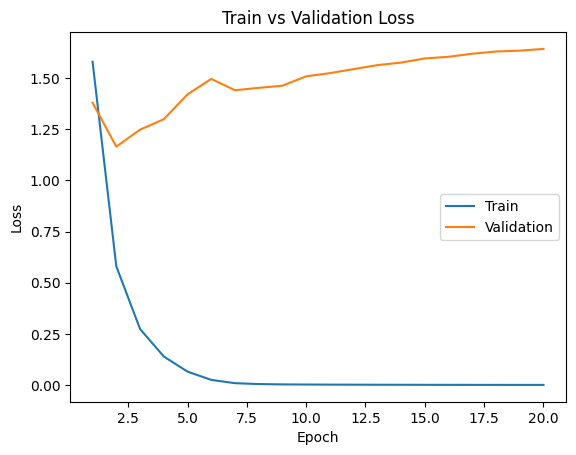

In [31]:
#plot curve here
plot_training_curve("model_{0}_bs{1}_lr{2}_epoch{3}".format("fungaV1", BATCH_SIZE, LEARNING_RATE, NUM_EPOCHS))

Test model

In [32]:
#test accuracy function
def getAccuracy(net, loader):
  correct, count = 0, 0

  #no gradient modification
  with torch.no_grad():
    print("Total number of batches: ", len(loader))
    for currbatch, (i, corr) in enumerate(loader):
      count += corr.shape[0]
      print("CurrBatch: ", currbatch+1)

      correct += (torch.max(net(i), 1)[1] == corr).sum().item()

  return correct / count

In [38]:

bestNet = preLearnedFungaV1()
model_path = get_model_name("fungaV1", batch_size=BATCH_SIZE, lr=LEARNING_RATE, epoch=(NUM_EPOCHS-1))
state = torch.load(model_path)
bestNet.load_state_dict(state)

_,_, testLoad = dataLoadFunction(24)

dataLoad = testLoad

accuracy = getAccuracy(bestNet, dataLoad)
print("Test Classification Accuracy: ", accuracy)

Total number of batches:  102
CurrBatch:  1
CurrBatch:  2
CurrBatch:  3
CurrBatch:  4
CurrBatch:  5
CurrBatch:  6
CurrBatch:  7
CurrBatch:  8
CurrBatch:  9
CurrBatch:  10
CurrBatch:  11
CurrBatch:  12
CurrBatch:  13
CurrBatch:  14
CurrBatch:  15
CurrBatch:  16
CurrBatch:  17
CurrBatch:  18
CurrBatch:  19
CurrBatch:  20
CurrBatch:  21
CurrBatch:  22
CurrBatch:  23
CurrBatch:  24
CurrBatch:  25
CurrBatch:  26
CurrBatch:  27
CurrBatch:  28
CurrBatch:  29
CurrBatch:  30
CurrBatch:  31
CurrBatch:  32
CurrBatch:  33
CurrBatch:  34
CurrBatch:  35
CurrBatch:  36
CurrBatch:  37
CurrBatch:  38
CurrBatch:  39
CurrBatch:  40
CurrBatch:  41
CurrBatch:  42
CurrBatch:  43
CurrBatch:  44
CurrBatch:  45
CurrBatch:  46
CurrBatch:  47
CurrBatch:  48
CurrBatch:  49
CurrBatch:  50
CurrBatch:  51
CurrBatch:  52
CurrBatch:  53
CurrBatch:  54
CurrBatch:  55
CurrBatch:  56
CurrBatch:  57
CurrBatch:  58
CurrBatch:  59
CurrBatch:  60
CurrBatch:  61
CurrBatch:  62
CurrBatch:  63
CurrBatch:  64
CurrBatch:  65
Curr